In [67]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

from scipy.stats import gamma
from scipy.optimize import minimize

%matplotlib inline

In [68]:
# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [69]:
D=0.05
V_th=1
mu=0.3

In [70]:

a=10#int(1/(2*D))
b=0.1#a*mu

In [71]:
print(a,b)

10 0.1


theoritical eigenvalue $\lambda_n=\beta(exp(\frac{2\pi i}{\gamma}n)-1)$

In [72]:
th_eigv=[]
for n in range(a):
    th_eigv.append(b*(np.exp(2*np.pi*1j*n/a)-1))

In [73]:
print(th_eigv)

[0j, (-0.019098300562505256+0.058778525229247314j), (-0.069098300562505252+0.095105651629515356j), (-0.13090169943749475+0.09510565162951537j), (-0.18090169943749476+0.058778525229247328j), (-0.20000000000000001+1.2246467991473533e-17j), (-0.18090169943749476-0.058778525229247307j), (-0.13090169943749475-0.095105651629515356j), (-0.06909830056250528-0.09510565162951537j), (-0.019098300562505267-0.058778525229247328j)]


In [74]:
t_window=250
dt=0.5
N=int(t_window/dt)

N_sim=int(400/dt)

t_vec=[(j)*dt for j in range(N+1)]
time_vec=[(j)*dt for j in range(N_sim)]

In [75]:
def S(t,a,b):
    return 1-sc.special.gammainc(a,b*t)

def P(t,a,b):
    return (b**a)*(t**(a-1))*np.exp(-b*t)/sc.special.gamma(a)

def RHO(t,a,b):
    return P(t,a,b)/S(t,a,b)

In [76]:
P_=[P(t,a,b) for t in t_vec]
S_=[S(t,a,b) for t in t_vec]
RHO_=[RHO(t,a,b) for t in t_vec]

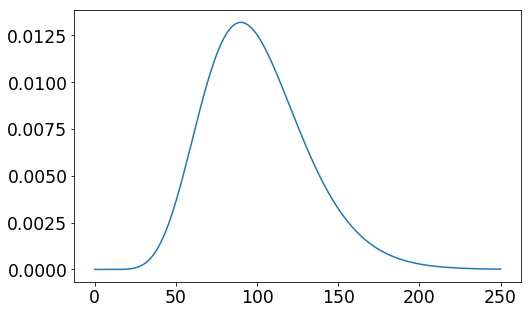

In [77]:
plt.plot(t_vec,P_)

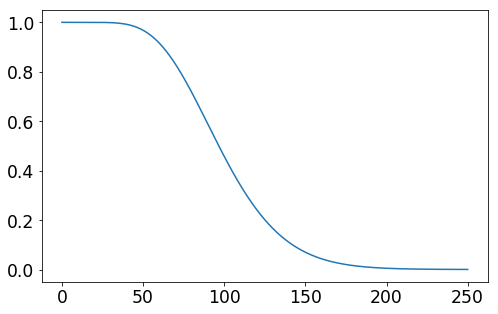

In [78]:
plt.plot(t_vec,S_)

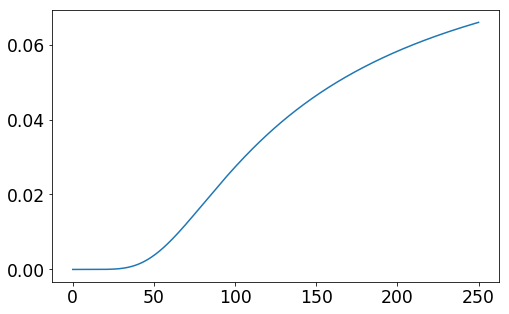

In [79]:
plt.plot(t_vec,RHO_)

In [80]:
q_old=np.zeros((N+1,1))
q_old[0]=1

q=np.zeros((N+1,int(N_sim/10)))

A=np.zeros((N_sim,1))

q_new=np.zeros((N+1,1))

i_store=0

for it in range(N_sim):
    
    t=it*dt
   
    A[it]=q_new[0]#/dt
    q_new = np.zeros((N + 1, 1))
   

    for ir in range(N):
        
        
        rho_ =  RHO(ir*dt,a,b)


        q_new[ir + 1] = q_old[ir] * (1 - dt * rho_)
        q_new[0] += dt * rho_ * q_old[ir]

    
    rho = RHO(N*dt,a,b)
    q_new[N] += q_old[N] * (1 - dt * rho)
    q_new[0] += dt * rho_ * q_old[N]
    
    q_new/=(np.sum(q_new*dt))


    q_old = q_new

    
    
    if it%10==0:
        q[:,i_store]=q_new.flatten()
        i_store+=1
        

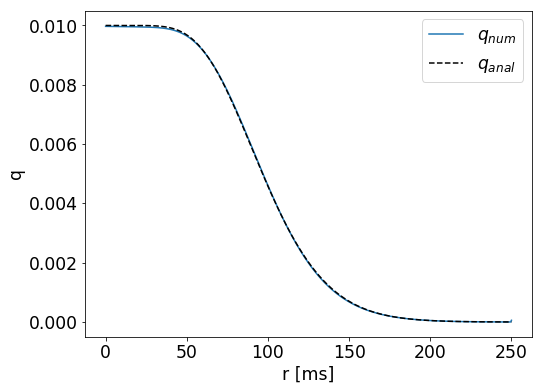

In [81]:
plt.figure(figsize=(8,6))
plt.plot(t_vec, q[:,-1],label='$q_{num}$')
plt.plot(t_vec,b/a*np.copy(S_),label='$q_{anal}$',c='k',ls='--')
plt.xlabel('r [ms]')
plt.ylabel('q')
plt.legend()



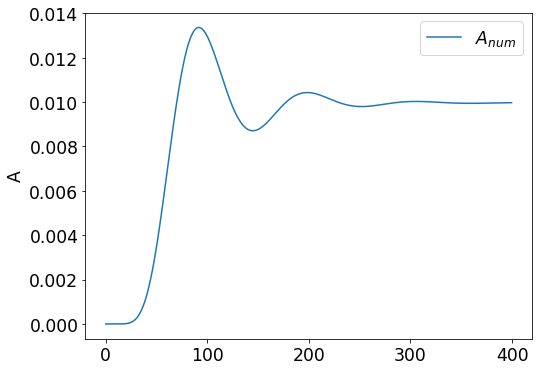

In [82]:
t_A=[(j)*dt for j in range(N_sim)]
plt.figure(figsize=(8,6))
plt.plot(t_A,A,label='$A_{num}$')
plt.ylabel('A')
plt.legend()
#plt.ylim(0,0.02)

# L MATRIX

In [24]:


L=np.zeros((N+1,N+1))
for i in range(N-1):
    L[0,i+1]=RHO(i*dt,a,b)*dt
    L[i+1,i+1]=-1-RHO(i*dt,a,b)*dt
    L[i+2,i+1]=1
    
L[0,0]=-1
L[1,0]=1
L[0,N]=1
L[N,N]=-1

In [25]:
eigv, vec = np.linalg.eig(L)
eigv=eigv/dt
arr_idx = np.argsort(eigv.real)

for i in range(int((len(arr_idx))/2)): 
    
    if eigv[arr_idx[::-1][2*i+1]].imag<0 :
        
        first=1*arr_idx[::-1][2*i+1]
        second=1*arr_idx[::-1][2*i+2]
        
        arr_idx[::-1][2*i+1]=second
        arr_idx[::-1][2*i+2]=first
        
            
eigv = eigv[arr_idx[::-1]]
vec = vec[:,arr_idx[::-1]]



In [26]:
Lt=np.matrix.getH(L)
eigvt, vect = np.linalg.eig(Lt)
eigvt=eigvt/dt
arr_idxt = np.argsort(eigvt.real)

for i in range(int((len(arr_idxt))/2)): 
    
    if eigvt[arr_idxt[::-1][2*i+1]].imag<0 :
        
        first=1*arr_idxt[::-1][2*i+1]
        second=1*arr_idxt[::-1][2*i+2]
        
        arr_idxt[::-1][2*i+1]=second
        arr_idxt[::-1][2*i+2]=first
        
            
eigvt = eigvt[arr_idxt[::-1]]
vect = vect[:,arr_idxt[::-1]]

(-2, 2)

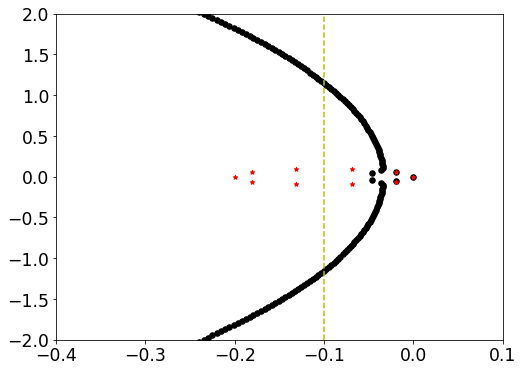

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(eigv.real, eigv.imag, s=30, marker='o', c='k',label='eigenvalues of L')
for l in th_eigv:
    plt.scatter(l.real, l.imag, s=20, marker='*', c='r',label='theoretical eigenvalues')
    
plt.plot([-b,-b],[-2,2],ls='--',c='y')
#plt.plot([-b/2,-b/2],[-2,2],ls='--',c='y')
    
plt.xlim(-0.4,0.1)
plt.ylim(-2,2)

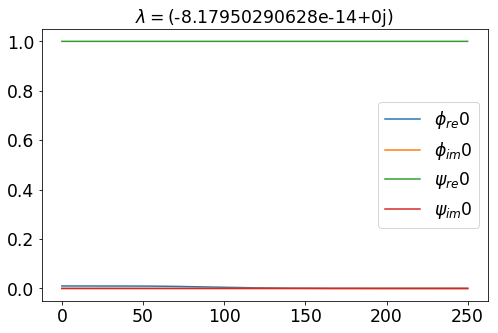

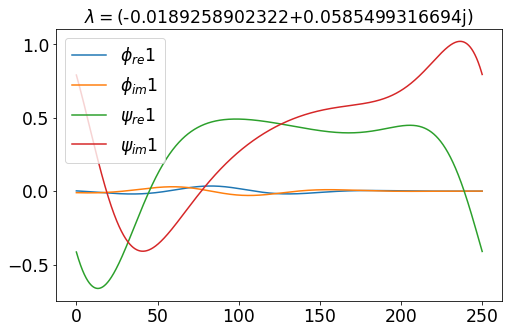

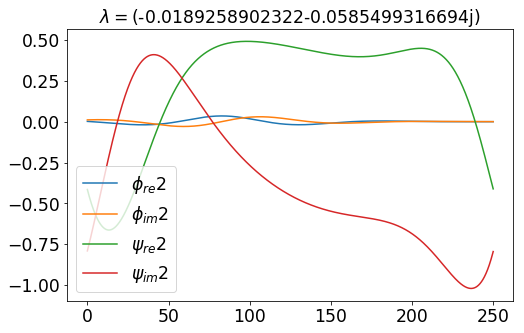

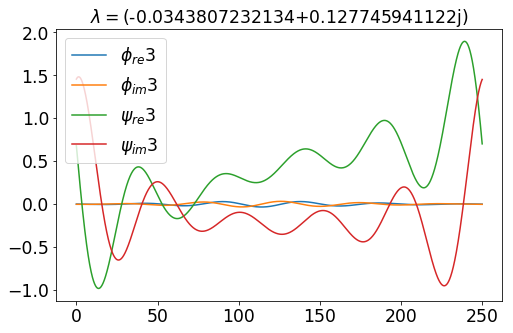

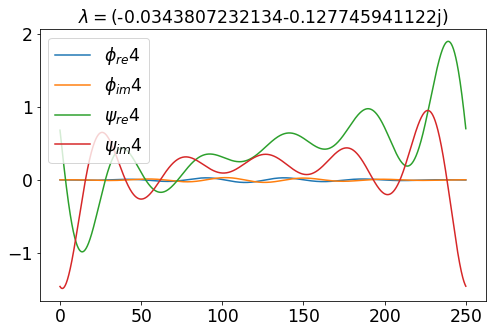

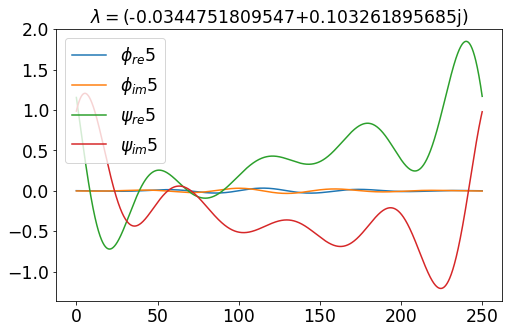

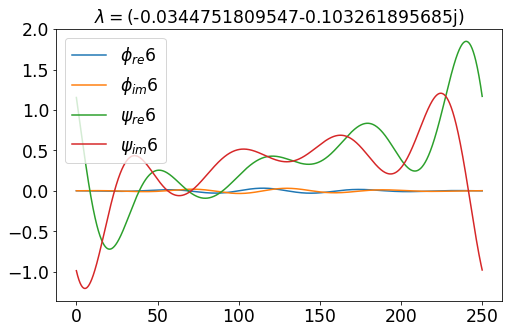

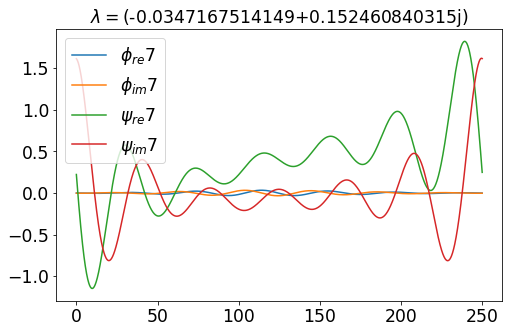

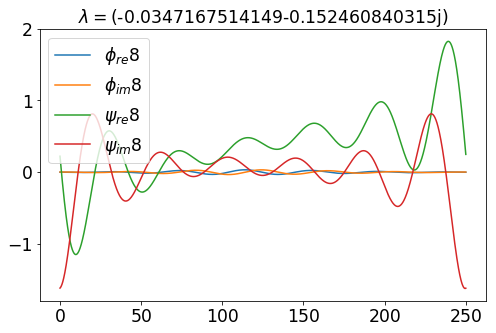

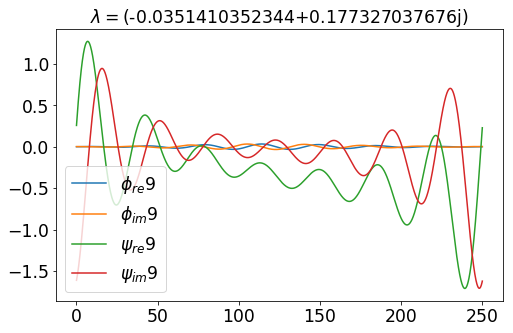

In [28]:
n_first=10

lambda_list=[]
qn0=[]
an0=[]

q_initial=np.zeros((N+1,1))
q_initial[0]=1

t_=[j*dt for j in range(N+1)]


for idx in range(n_first):
    
    lambda_list.append(eigv[idx])
    phi=1*vec[:,idx]
    psi=1*vect[:,idx]
        
    
    if idx==0:
        norm=abs(np.sum(vec[:,idx].real)*dt)
        phi=phi/norm
            
    if phi[0].real<0:
        phi=phi*(-1)
        
        
    normt=phi.dot(psi)*dt
    psi=psi/normt

    
    plt.figure()
    plt.title('$\lambda=$'+str(eigv[idx]))
    plt.plot(t_,phi.real,label='$\phi_{re}$'+str(idx))
    plt.plot(t_,phi.imag,label='$\phi_{im}$'+str(idx))
    plt.plot(t_,psi.real,label='$\psi_{re}$'+str(idx))
    plt.plot(t_,psi.imag,label='$\psi_{im}$'+str(idx))
    plt.legend() 
        
    qn0.append(phi[0])
    an0.append(psi.dot(q_initial))
    
         
nu=np.zeros((N_sim,len(qn0)+1))
for i in range(N_sim):
    t=i*dt
    for n in range(len(qn0)):
        nu[i,n+1]= nu[i,n]+(np.exp(t*lambda_list[n])*qn0[n]*an0[n]).real
        
        
         


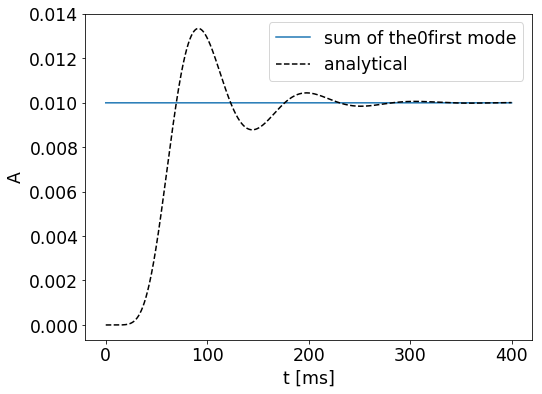

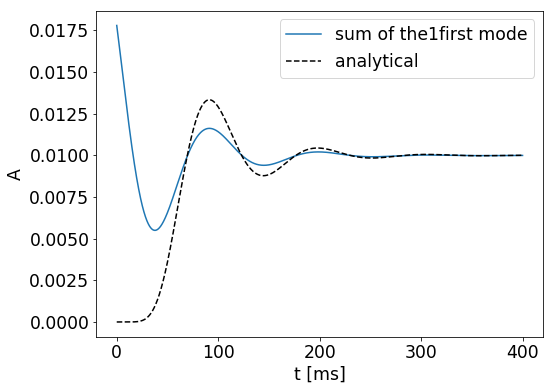

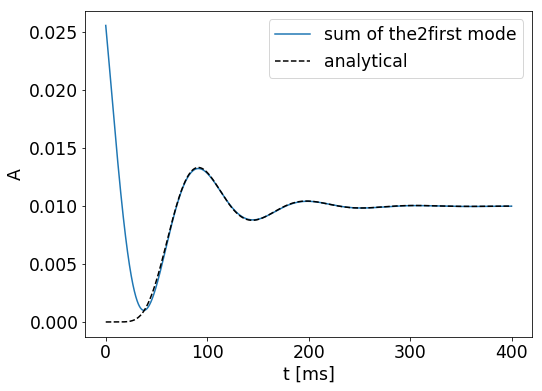

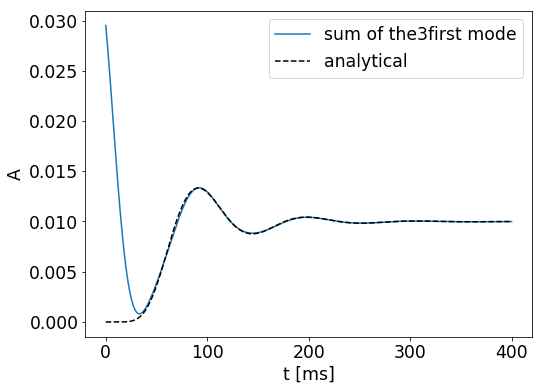

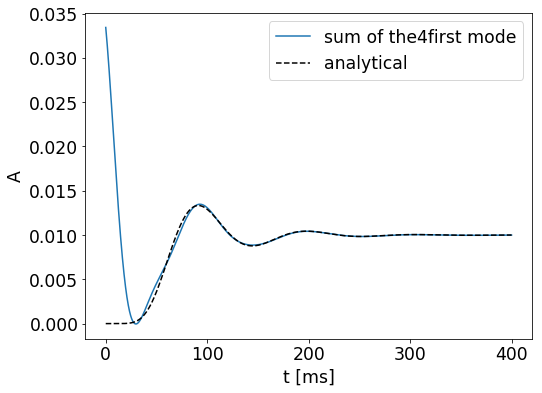

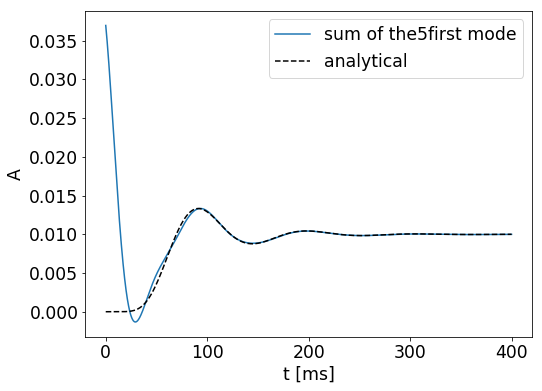

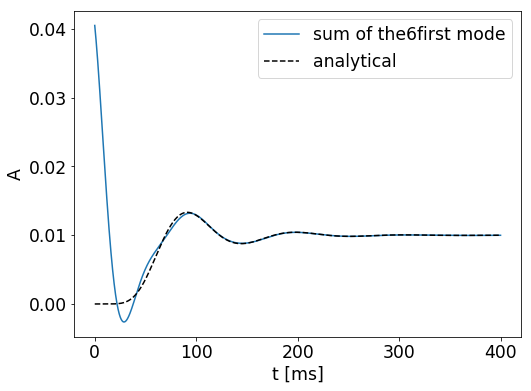

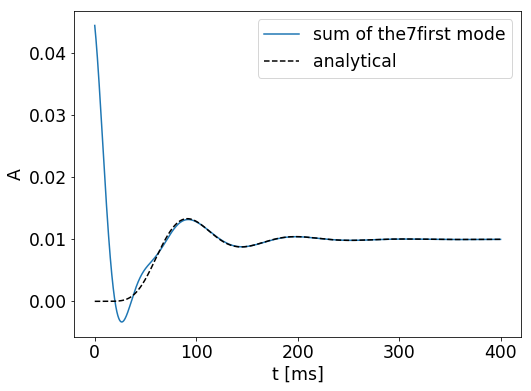

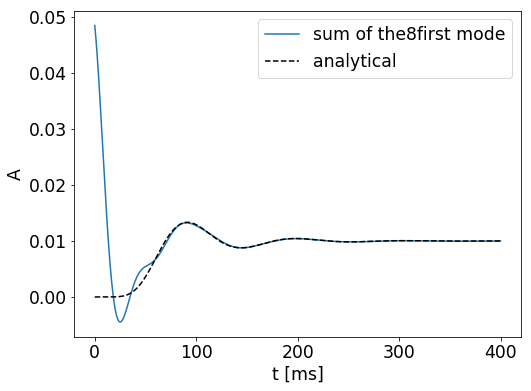

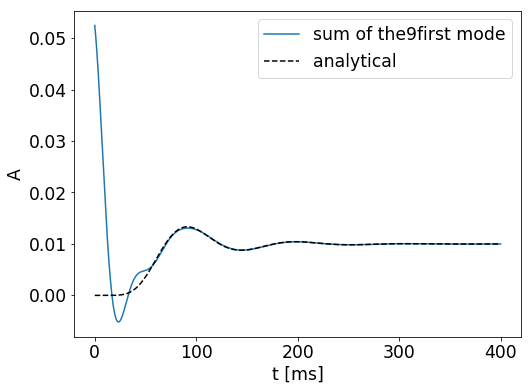

In [29]:

plt.figure(figsize=(8,6))

for i in range(len(qn0)):
    plt.figure(figsize=(8,6))
    plt.plot(time_vec,nu[:,i+1], label='sum of the' +str(i)+'first mode')
    plt.plot(t_A,A,c='k',ls='--',label='analytical')
    plt.xlabel('t [ms]')
    plt.ylabel('A')
    plt.legend()
 

Sum of all mode

In [30]:


def coeff(n,a,b):
    l=b*(np.exp(2*np.pi*1j*n/a)-1)
    print(l)
    
    print(-b,l.real)
    
    product=1/(a*(b**a)*(b+l)**(-a-1))
    
    print(qn0[n]*an0[n],product)
    
    

In [31]:
def eigenvalue(n,a,b):
    return b*(np.exp(2*np.pi*1j*n/a)-1)

def psi0phi0(n,a,b):
    l=eigenvalue(n,a,b)
    product=1/(a*(b**a)*(b+l)**(-a-1))
    
    return product
    

In [32]:
def fun(z, t,c1,c2,c3):
    x, y = z
    return np.array([y, c3*(c1-x+c2*y)])

In [33]:
c1=b/a
c2=2*(1/eigenvalue(1,a,b)).real
c3=(eigenvalue(1,a,b)*eigenvalue(-1,a,b)).real

In [34]:
A0=(b/a+2*(psi0phi0(1,a,b)).real)
Apoint0=(2*(psi0phi0(1,a,b)*eigenvalue(1,a,b)).real)

/Users/gallo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


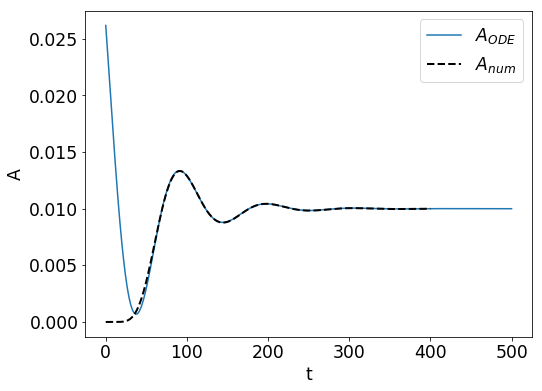

In [35]:
from scipy.integrate import odeint
t = np.linspace(0, 500, num=np.round(500/0.5)+1)

sol = odeint(fun, [A0,Apoint0], t, args=(c1,c2,c3))[..., 0]

plt.figure(figsize=(8,6))
plt.plot(t, sol,label='$A_{ODE}$')
#plt.plot(t+7.8, 1000*sol,label='$A_{ODE}$ shifted',c='r')
plt.plot(t_A,A,label='$A_{num}$',ls='--',c='k',lw=2)
plt.legend()
plt.xlabel('t')
plt.ylabel('A')
plt.legend()
plt.savefig('AODEgamma10.pdf')

Activity

In [83]:
#int((a-2)/2

if a%2==0:
    Nmax=int((a-2)/2)
    activity=np.zeros((N_sim,Nmax+2))
else:
    Nmax=int((a-1)/2)
    activity=np.zeros((N_sim,Nmax+1))
    

    
for i in range(N_sim):
    coeff=psi0phi0(0,a,b)
    activity[i,0]= (coeff).real
             

for n in range(Nmax):
    
    l=eigenvalue(n+1,a,b)
    print(l)
    #l_=eigenvalue(-n-1)
    coeff=psi0phi0(n+1,a,b)
    #coeff_=psi0phi0(-n-1)
    for i in range(N_sim):
        t=i*dt
        #activity[i,n+1]= activity[i,n]+(np.exp(t*l)*coeff+np.exp(t*l_)*coeff_)
        activity[i,n+1]= activity[i,n]+2*(np.exp(t*l)*coeff).real
        
if a%2==0:
    
    l=eigenvalue(Nmax+1,a,b).real
    coeff=psi0phi0(Nmax+1,a,b).real
 
    for i in range(N_sim):
        t=i*dt
      
        activity[i,-1]= activity[i,-2]+(np.exp(t*l)*coeff).real
        


(-0.0190983005625+0.0587785252292j)
(-0.0690983005625+0.0951056516295j)
(-0.130901699437+0.0951056516295j)
(-0.180901699437+0.0587785252292j)


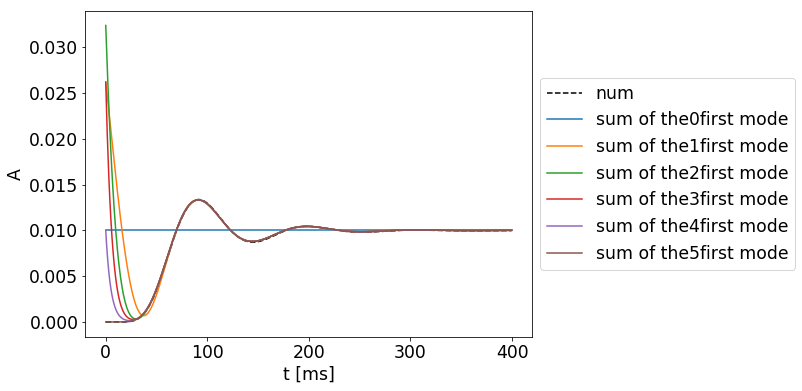

In [84]:
plt.figure(figsize=(8,6))
plt.plot(t_A,A,c='k',ls='--',label='num')
for i in range(activity.shape[1]):
    
    plt.plot(time_vec,activity[:,i], label='sum of the' +str(i)+'first mode')

    plt.xlabel('t [ms]')
    plt.ylabel('A')
    #plt.legend()
    #plt.ylim(0,0.014)
 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

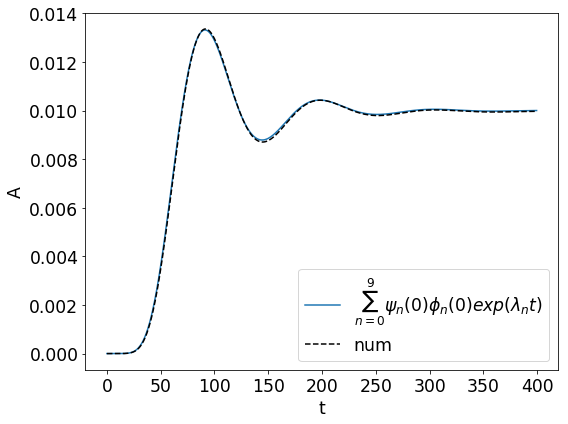

In [85]:
plt.figure(figsize=(8,6))

plt.plot(time_vec,activity[:,-1],label='$\sum_{n=0}^9\psi_n(0)\phi_n(0)exp(\lambda_nt)$')
plt.plot(t_A,A,c='k',ls='--',label='num')

plt.xlabel('t')
plt.ylabel('A')

#plt.ylim(0,0.014)
 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('sum10gamma.pdf')

changing beta in time

In [90]:
a=10  #int(1/(2*D))
b0=0.1  #a*mu

t_window=250
#dt=0.5
dt=0.5
N=int(t_window/dt)

N_sim=int(300/dt)

t_vec=[(j)*dt for j in range(N+1)]
time_vec=[(j)*dt for j in range(N_sim)]

In [91]:
epsilon=0.0001

In [92]:
q_old=np.zeros((N+1,1))
q_old[0]=1

q=np.zeros((N+1,int(N_sim/10)))

A=np.zeros((N_sim,1))

q_new=np.zeros((N+1,1))

i_store=0

for it in range(N_sim):
    
    t=it*dt
    b=b0+epsilon*t
   
    A[it]=q_new[0]#/dt
    q_new = np.zeros((N + 1, 1))
   

    for ir in range(N):
        
        
        rho_ =  RHO(ir*dt,a,b)


        q_new[ir + 1] = q_old[ir] * (1 - dt * rho_)
        q_new[0] += dt * rho_ * q_old[ir]

    
    rho = RHO(N*dt,a,b)
    q_new[N] += q_old[N] * (1 - dt * rho)
    q_new[0] += dt * rho_ * q_old[N]
    
    q_new/=(np.sum(q_new*dt))


    q_old = q_new

    
    
    if it%10==0:
        q[:,i_store]=q_new.flatten()
        i_store+=1
        

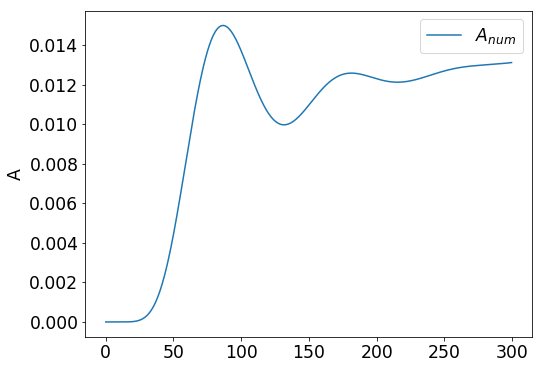

In [93]:
t_A=[(j)*dt for j in range(N_sim)]
plt.figure(figsize=(8,6))
plt.plot(t_A,A,label='$A_{num}$')
plt.ylabel('A')
plt.legend()

In [98]:
#int((a-2)/2


if a%2==0:
    Nmax=int((a-2)/2)
    activity=np.zeros((N_sim,Nmax+2))
else:
    Nmax=int((a-1)/2)
    activity=np.zeros((N_sim,Nmax+1))
    



    
for i in range(N_sim):
    
    t=i*dt
    b=b0+0.5*epsilon*t
    
    coeff=psi0phi0(0,a,b)
    activity[i,0]= (coeff).real
             

for n in range(Nmax):
    
   
    for i in range(N_sim):
        t=i*dt
        
        b=b0+0.5*epsilon*t
        l=eigenvalue(n+1,a,b)
        coeff=psi0phi0(n+1,a,b)
        
        
        activity[i,n+1]= activity[i,n]+2*(np.exp(t*l)*coeff).real
        
if a%2==0:
    
   
 
    for i in range(N_sim):
        t=i*dt
        b=b0+0.5*epsilon*t
        
        l=eigenvalue(Nmax+1,a,b).real
        coeff=psi0phi0(Nmax+1,a,b).real
      
        activity[i,-1]= activity[i,-2]+(np.exp(t*l)*coeff).real
        



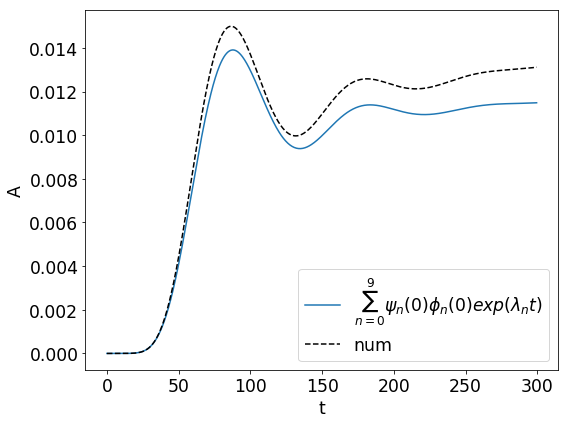

In [99]:
plt.figure(figsize=(8,6))

plt.plot(time_vec,activity[:,-1],label='$\sum_{n=0}^9\psi_n(0)\phi_n(0)exp(\lambda_nt)$')
plt.plot(t_A,A,c='k',ls='--',label='num')

plt.xlabel('t')
plt.ylabel('A')

#plt.ylim(0,0.014)
 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('sum10gamma.pdf')

In [95]:
activity[:,-1]

array([  2.42861287e-17,   2.77555756e-17,  -2.08166817e-17, ...,
         1.49970140e-02,   1.49980138e-02,   1.49990136e-02])

In [96]:
A

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [  2.73103874e-25],
       ..., 
       [  1.51636137e-02],
       [  1.51645985e-02],
       [  1.51655833e-02]])

In [101]:
a1=np.zeros((N_sim,1))

    
    
   
for i in range(N_sim):
    t=i*dt
        
    b=b0+0.0001*t
    l1=eigenvalue(1,a,b)
    coeff1=psi0phi0(1,a,b)
    coeff0=psi0phi0(0,a,b)
        
    a1[i]= (coeff0).real +2*(np.exp(t*l1)*coeff1).real
        




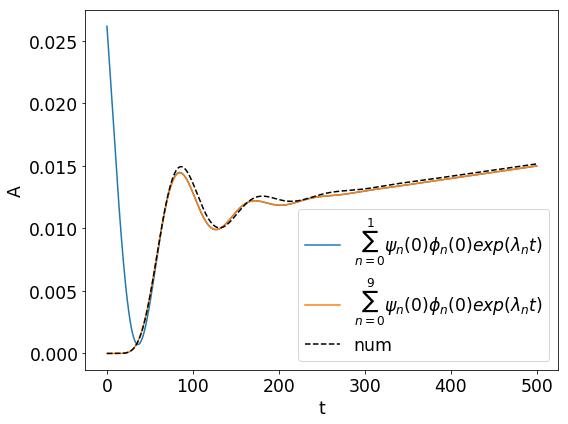

In [103]:
plt.figure(figsize=(8,6))

plt.plot(time_vec,a1,label='$\sum_{n=0}^1\psi_n(0)\phi_n(0)exp(\lambda_nt)$')

plt.plot(time_vec,activity[:,-1],label='$\sum_{n=0}^9\psi_n(0)\phi_n(0)exp(\lambda_nt)$')
plt.plot(t_A,A,c='k',ls='--',label='num')

plt.xlabel('t')
plt.ylabel('A')

#plt.ylim(0,0.014)
 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('sum10gamma.pdf')